In [1]:
#Importing dependencies 
import pandas as pd
import os 
import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing csv from Resources 
path = 'Resources/VISTA_cleaned.csv'
Vista = pd.read_csv(path)

city_line_path = 'Resources/Station_line _map.csv'
City_line = pd.read_csv(city_line_path)

/var/folders/zh/1g9r_87s0_b2prpx9v3501kr0000gn/T/ipykernel_41507/966131605.py:3: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  Vista = pd.read_csv(path)


In [3]:
City_line

,Zone,Line name,Station,City council
0,2,Sunbury line,Sunbury,Hume C
1,2,Sunbury line,Diggers Rest,Hume C
2,2,Sunbury line,Watergardens,Brimbank C
3,2,Sunbury line,Keilor Plains,Brimbank C
4,2,Sunbury line,St Albans,Brimbank C
...,...,...,...,...
359,1,Williamstown line,Flagstaff,Melbourne C
360,1,Williamstown line,Melbourne Central,Melbourne C
361,1,Williamstown line,Parliament,Melbourne C
362,1,Williamstown line,Southern Cross,Melbourne C


In [4]:
Council = City_line['City council'].unique()

In [5]:
Council

array(['Hume C  ', 'Brimbank C  ', 'Maribyrnong C  ', 'Melbourne C  ',
       'Boroondara C  ', 'Yarra C  ', 'Yarra Ranges S  ', 'Knox C  ',
       'Maroondah C  ', 'Whitehorse C  ', 'Moreland C  ',
       'Moonee Valley C  ', 'Casey C  ', 'Greater Dandenong C  ',
       'Kingston C  ', 'Monash C  ', 'Glen Eira C  ', 'Stonnington C  ',
       'Frankston C  ', 'Bayside C  ', 'Nillumbik S  ', 'Banyule C  ',
       'Darebin C  ', 'Manningham C  ', 'Whittlesea C  ', 'Cardinia S  ',
       'Port Phillip C  ', 'Mornington Peninsula S  ', 'Merri-Bec',
       'Wyndham C  ', 'Hobsons Bay C  '], dtype=object)

In [6]:
Vista

,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,Wait_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Y12H0000101P01T01,Y12H0000101P01,2012,1,1,525,545,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
1,Y12H0000101P01T02,Y12H0000101P01,2012,1,2,1050,1075,25,25,0,...,0,0,0,25,0.0,0.0,0.0,0.0,0.0,0.0
2,Y12H0000101P02T01,Y12H0000101P02,2012,1,1,500,520,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
3,Y12H0000101P02T02,Y12H0000101P02,2012,1,2,540,550,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0
4,Y12H0000101P02T03,Y12H0000101P02,2012,1,3,600,610,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206263,Y20H4001029P02T01,Y20H4001029P02,2020,1,1,600,620,20,20,0,...,0,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0
206264,Y20H4001029P02T02,Y20H4001029P02,2020,1,2,625,640,15,15,0,...,0,0,0,15,0.0,0.0,0.0,0.0,0.0,0.0
206265,Y20H4001039P01T01,Y20H4001039P01,2020,1,1,540,550,10,10,0,...,0,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0
206266,Y20H4001039P01T02,Y20H4001039P01,2020,1,2,590,650,60,60,0,...,0,0,0,60,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Checking columns in dataset
Vista.columns

Index(['Trip_ID', 'Person_ID', 'Year', 'Total_Stops', 'Trip_Count',
       'Start_Time', 'Arrival_Time', 'Trip_Time', 'Travel_Time', 'Wait_Time',
       'Duration', 'Total_Distance', 'Original_Place_1', 'Original_Place_2',
       'Original_Purpose_1', 'Original_Purpose_2', 'Destination_1',
       'Destination_2', 'Dest_Purpose_1', 'Dest_Purpose_2', 'Starting_LGA',
       'Ending_LGA', 'Trip_Purpose', 'Link_Mode', 'Dist_1', 'Dist_2', 'Dist_3',
       'Dist_4', 'Dist_5', 'Dist_6', 'Dist_7', 'Mode_1', 'Mode_2', 'Mode_3',
       'Mode_4', 'Mode_5', 'Mode_6', 'Mode_7', 'Time_1', 'Time_2', 'Time_3',
       'Time_4', 'Time_5', 'Time_6', 'Time_7'],
      dtype='object')

## Grouping the data by starting and ending LGA

In [8]:
#Grouping by starting LGA and counting the rows in each group
Start_LGA_df = Vista.groupby(by='Starting_LGA').count().reset_index(drop=False)

In [9]:
#Removing uncessary columns
Start_LGA_df = Start_LGA_df[['Starting_LGA','Trip_ID']]
#Renaming the column for merge later
Start_LGA_df = Start_LGA_df.rename(columns = {'Starting_LGA':'LGA','Trip_ID':'Starting LGA count'})

In [10]:
#Grouping by ending LGA 
Ending_LGA_df = Vista.groupby(by='Ending_LGA').count().reset_index(drop=False)

In [11]:
#Removing uncessary columns
Ending_LGA_df = Ending_LGA_df[['Ending_LGA','Trip_ID']]
#Renaming the column for merge later
Ending_LGA_df = Ending_LGA_df.rename(columns = {'Ending_LGA':'LGA','Trip_ID':'Ending LGA count'})

In [12]:
#Merge the LGA counts dataframes
LGA_count = pd.merge(Start_LGA_df,Ending_LGA_df,on='LGA')

In [13]:
#Sort by increasing starting LGA count
LGA_count = LGA_count.sort_values('Starting LGA count')

In [14]:
#Changing values to log 
LGA_count['Start Log Value'] = np.log2(LGA_count['Starting LGA count'])
LGA_count['End Log Value'] = np.log2(LGA_count['Ending LGA count'])

In [15]:
LGA_count

,LGA,Starting LGA count,Ending LGA count,Start Log Value,End Log Value
28,Murrindindi (S),20,60,4.321928,5.906891
9,Golden Plains (S),38,36,5.247928,5.169925
22,Mitchell (S),52,87,5.700440,6.442943
31,Queenscliffe (B),98,101,6.614710,6.658211
25,Moorabool (S),101,114,6.658211,6.832890
16,Macedon Ranges (S),134,156,7.066089,7.285402
33,Surf Coast (S),449,432,8.810572,8.754888
29,Nillumbik (S),2892,2888,11.497852,11.495855
4,Cardinia (S),3030,2988,11.565102,11.544964
21,Melton (C),3360,3344,11.714246,11.707359


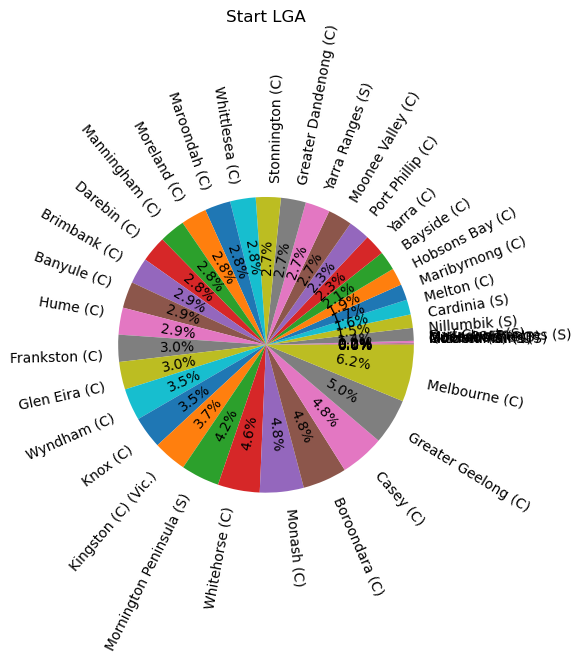

In [40]:
#Create pie chart for melbourne compared to others
labels = LGA_count['LGA'].unique()

sizes = LGA_count['Starting LGA count']


fig, ax = plt.subplots()
patches, labels, pct_texts = ax.pie(sizes,labels=labels,rotatelabels=True,autopct='%1.1f%%')
plt.title('Start LGA',pad=100)

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
    
plt.show()

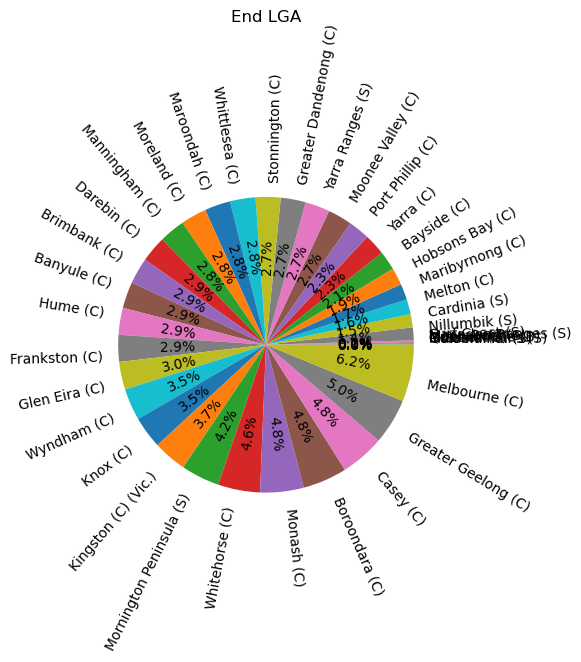

In [42]:
labels = LGA_count['LGA'].unique()
sizes2= LGA_count['Ending LGA count']

fig, ax = plt.subplots()
patches, labels, pct_texts = ax.pie(sizes2,labels=labels,rotatelabels=True,autopct='%1.1f%%')
plt.title('End LGA',pad=100)

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
    
plt.show()

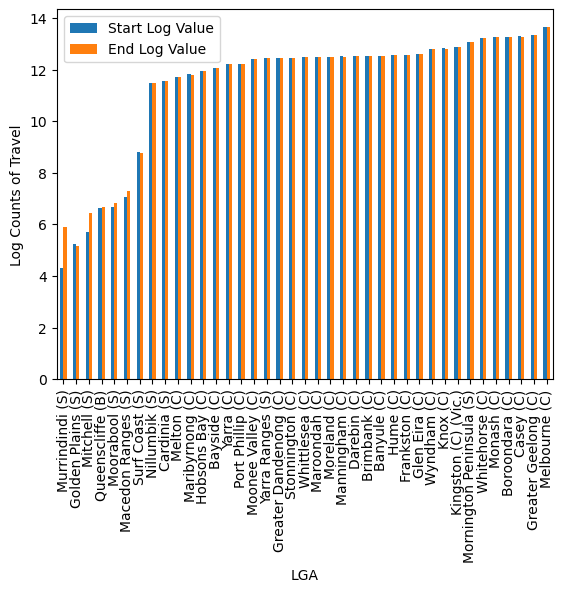

In [18]:
LGA_count.plot(kind='bar',x = 'LGA',y=['Start Log Value','End Log Value'],ylabel='Log Counts of Travel')

plt.show()

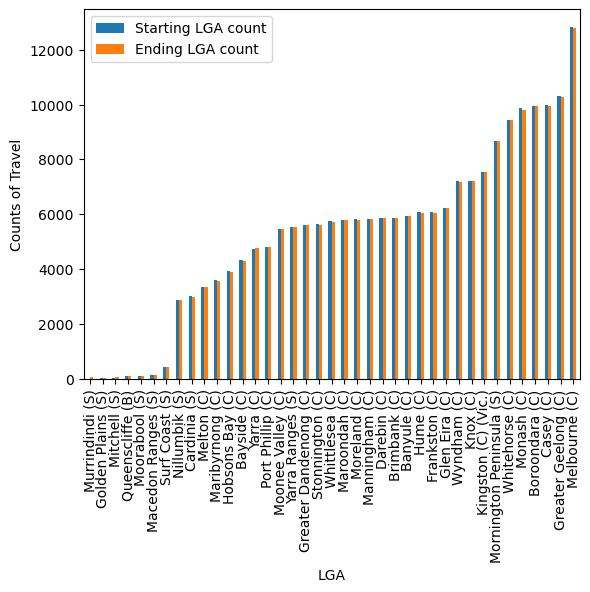

In [19]:
LGA_count.plot(kind='bar',x = 'LGA',y=['Starting LGA count','Ending LGA count'],ylabel= 'Counts of Travel')
plt.tight_layout
plt.show()

## Grouping by purpose of travel

In [20]:
purpose_travel = Vista.groupby(by = 'Trip_Purpose').count()

In [21]:
purpose_travel_df = purpose_travel.reset_index(drop=False)[['Trip_Purpose','Trip_ID']]

In [22]:
purpose_travel_df = purpose_travel_df.sort_values(by='Trip_ID')

In [23]:
purpose_travel_df

,Trip_Purpose,Trip_ID
5,Not Stated,5
1,At or Go Home,31
12,Unknown Purpose,545
6,Other Purpose,992
8,Pick-up or Deliver Something,4239
3,Change Mode,6994
0,Accompany Someone,11683
4,Education,12781
7,Personal Business,18176
10,Recreational,18606


##

## Checking the usage of Bus, Train, Tram over 2018-2020

In [24]:
#Find the total counts Link_Mode for bus train and trams (The main mode of transport)
Mode_year_df = Vista.groupby(by=['Link_Mode','Year']).count().reset_index()

In [25]:
Mode_year_df

,Link_Mode,Year,Trip_ID,Person_ID,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Bicycle,2012,245,245,245,245,245,245,245,245,...,245,245,245,245,245,245,245,245,245,245
1,Bicycle,2013,465,465,465,465,465,465,465,465,...,465,465,465,465,465,465,465,465,465,465
2,Bicycle,2014,496,496,496,496,496,496,496,496,...,496,496,496,496,496,496,496,496,496,496
3,Bicycle,2015,530,530,530,530,530,530,530,530,...,530,530,530,530,530,530,530,530,530,530
4,Bicycle,2016,419,419,419,419,419,419,419,419,...,419,419,419,419,419,419,419,419,419,419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Walking,2016,4049,4049,4049,4049,4049,4049,4049,4049,...,4049,4049,4049,4049,4049,4049,4049,4049,4049,4049
104,Walking,2017,2441,2441,2441,2441,2441,2441,2441,2441,...,2441,2441,2441,2441,2441,2441,2441,2441,2441,2441
105,Walking,2018,5006,5006,5006,5006,5006,5006,5006,5006,...,5006,5006,5006,5006,5006,5006,5006,5006,5006,5006
106,Walking,2019,3503,3503,3503,3503,3503,3503,3503,3503,...,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503


In [26]:
Mode_year_df = Mode_year_df.loc[((Mode_year_df['Year']==2018)|(Mode_year_df['Year']==2019)|(Mode_year_df['Year']==2020))]

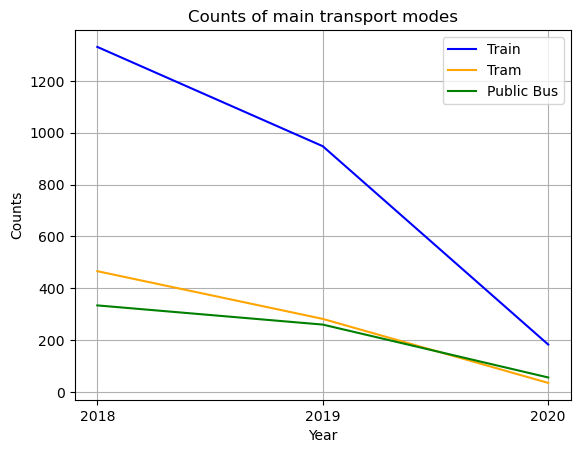

In [27]:
#Plot scatter of counts over time
plt.subplots()
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Train']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Train']['Trip_ID'],label='Train',color='Blue')
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Tram']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Tram']['Trip_ID'],label='Tram',color='Orange')
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Public Bus']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Public Bus']['Trip_ID'],label='Public Bus',color='Green')
plt.xticks((2018,2019,2020))
plt.title('Counts of main transport modes')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.grid()
plt.legend()

In [28]:
Mode_df = Vista.groupby(by='Link_Mode').count().reset_index()

In [29]:
Mode_df = Mode_df.loc[(Mode_df['Link_Mode']=='Train')|(Mode_df['Link_Mode']=='Tram')|(Mode_df['Link_Mode']=='Public Bus')]
Mode_df

,Link_Mode,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
5,Public Bus,2231,2231,2231,2231,2231,2231,2231,2231,2231,...,2231,2231,2231,2231,2231,2231,2231,2231,2231,2231
8,Train,8758,8758,8758,8758,8758,8758,8758,8758,8758,...,8758,8758,8758,8758,8758,8758,8758,8758,8758,8758
9,Tram,2491,2491,2491,2491,2491,2491,2491,2491,2491,...,2491,2491,2491,2491,2491,2491,2491,2491,2491,2491


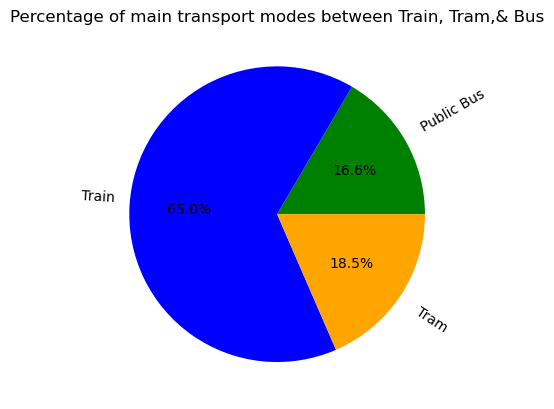

In [30]:
#Plot Pie Graph of main modes of transport used 
labels = Mode_df['Link_Mode'].unique()

sizes = Mode_df['Trip_ID']
fig, ax = plt.subplots()
colors = ['Green','Blue','Orange']
ax.pie(sizes,labels=labels,colors=colors,rotatelabels=True,autopct='%1.1f%%')
plt.title('Percentage of main transport modes between Train, Tram,& Bus')
plt.show()

In [31]:
#Get the counts of Public Bus, Train, Tram in Mode 1 - 10
Bus_counter = 0
Train_counter = 0
Tram_counter = 0

counts_df = Vista[['Mode_1','Mode_2','Mode_3','Mode_4','Mode_5','Mode_6','Mode_7',]]

In [32]:
counts_df['Mode_1'].value_counts()

Mode_1
Vehicle Driver       106915
Vehicle Passenger     47988
Walking               45340
Bicycle                3474
Other                   713
Taxi                    613
Motorcycle              431
School Bus              378
Jogging                 199
Train                   119
Public Bus               53
Mobility Scooter         26
Tram                     19
Name: count, dtype: int64

In [33]:
for column in counts_df:
        Bus_counter = Bus_counter + counts_df[column].value_counts()['Public Bus']
        Train_counter = Train_counter + counts_df[column].value_counts()['Train']
        Tram_counter = Tram_counter + counts_df[column].value_counts()['Tram']

print(Bus_counter)
print(Train_counter)
print(Tram_counter)
        


4127
9824
3917


In [34]:
#Turn counts into a dataframe to plot
labels = ['Bus','Train','Tram']
counts = [Bus_counter,Train_counter,Tram_counter]
data = {'Mode of Transport':labels,'Counts of Transport':counts}
Mode_counts = pd.DataFrame(data=data)

In [35]:
Mode_counts

,Mode of Transport,Counts of Transport
0,Bus,4127
1,Train,9824
2,Tram,3917


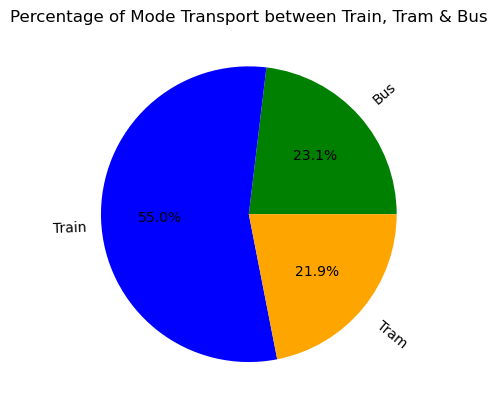

In [36]:
#Plot Pie Graph of Modes used.

sizes = Mode_counts['Counts of Transport']
fig, ax = plt.subplots()
colors = ['Green','Blue','Orange']
ax.pie(sizes,labels=labels,colors=colors,rotatelabels=True,autopct='%1.1f%%')
plt.title('Percentage of Mode Transport between Train, Tram & Bus')
plt.show()